In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('winequalityN.csv')

In [9]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

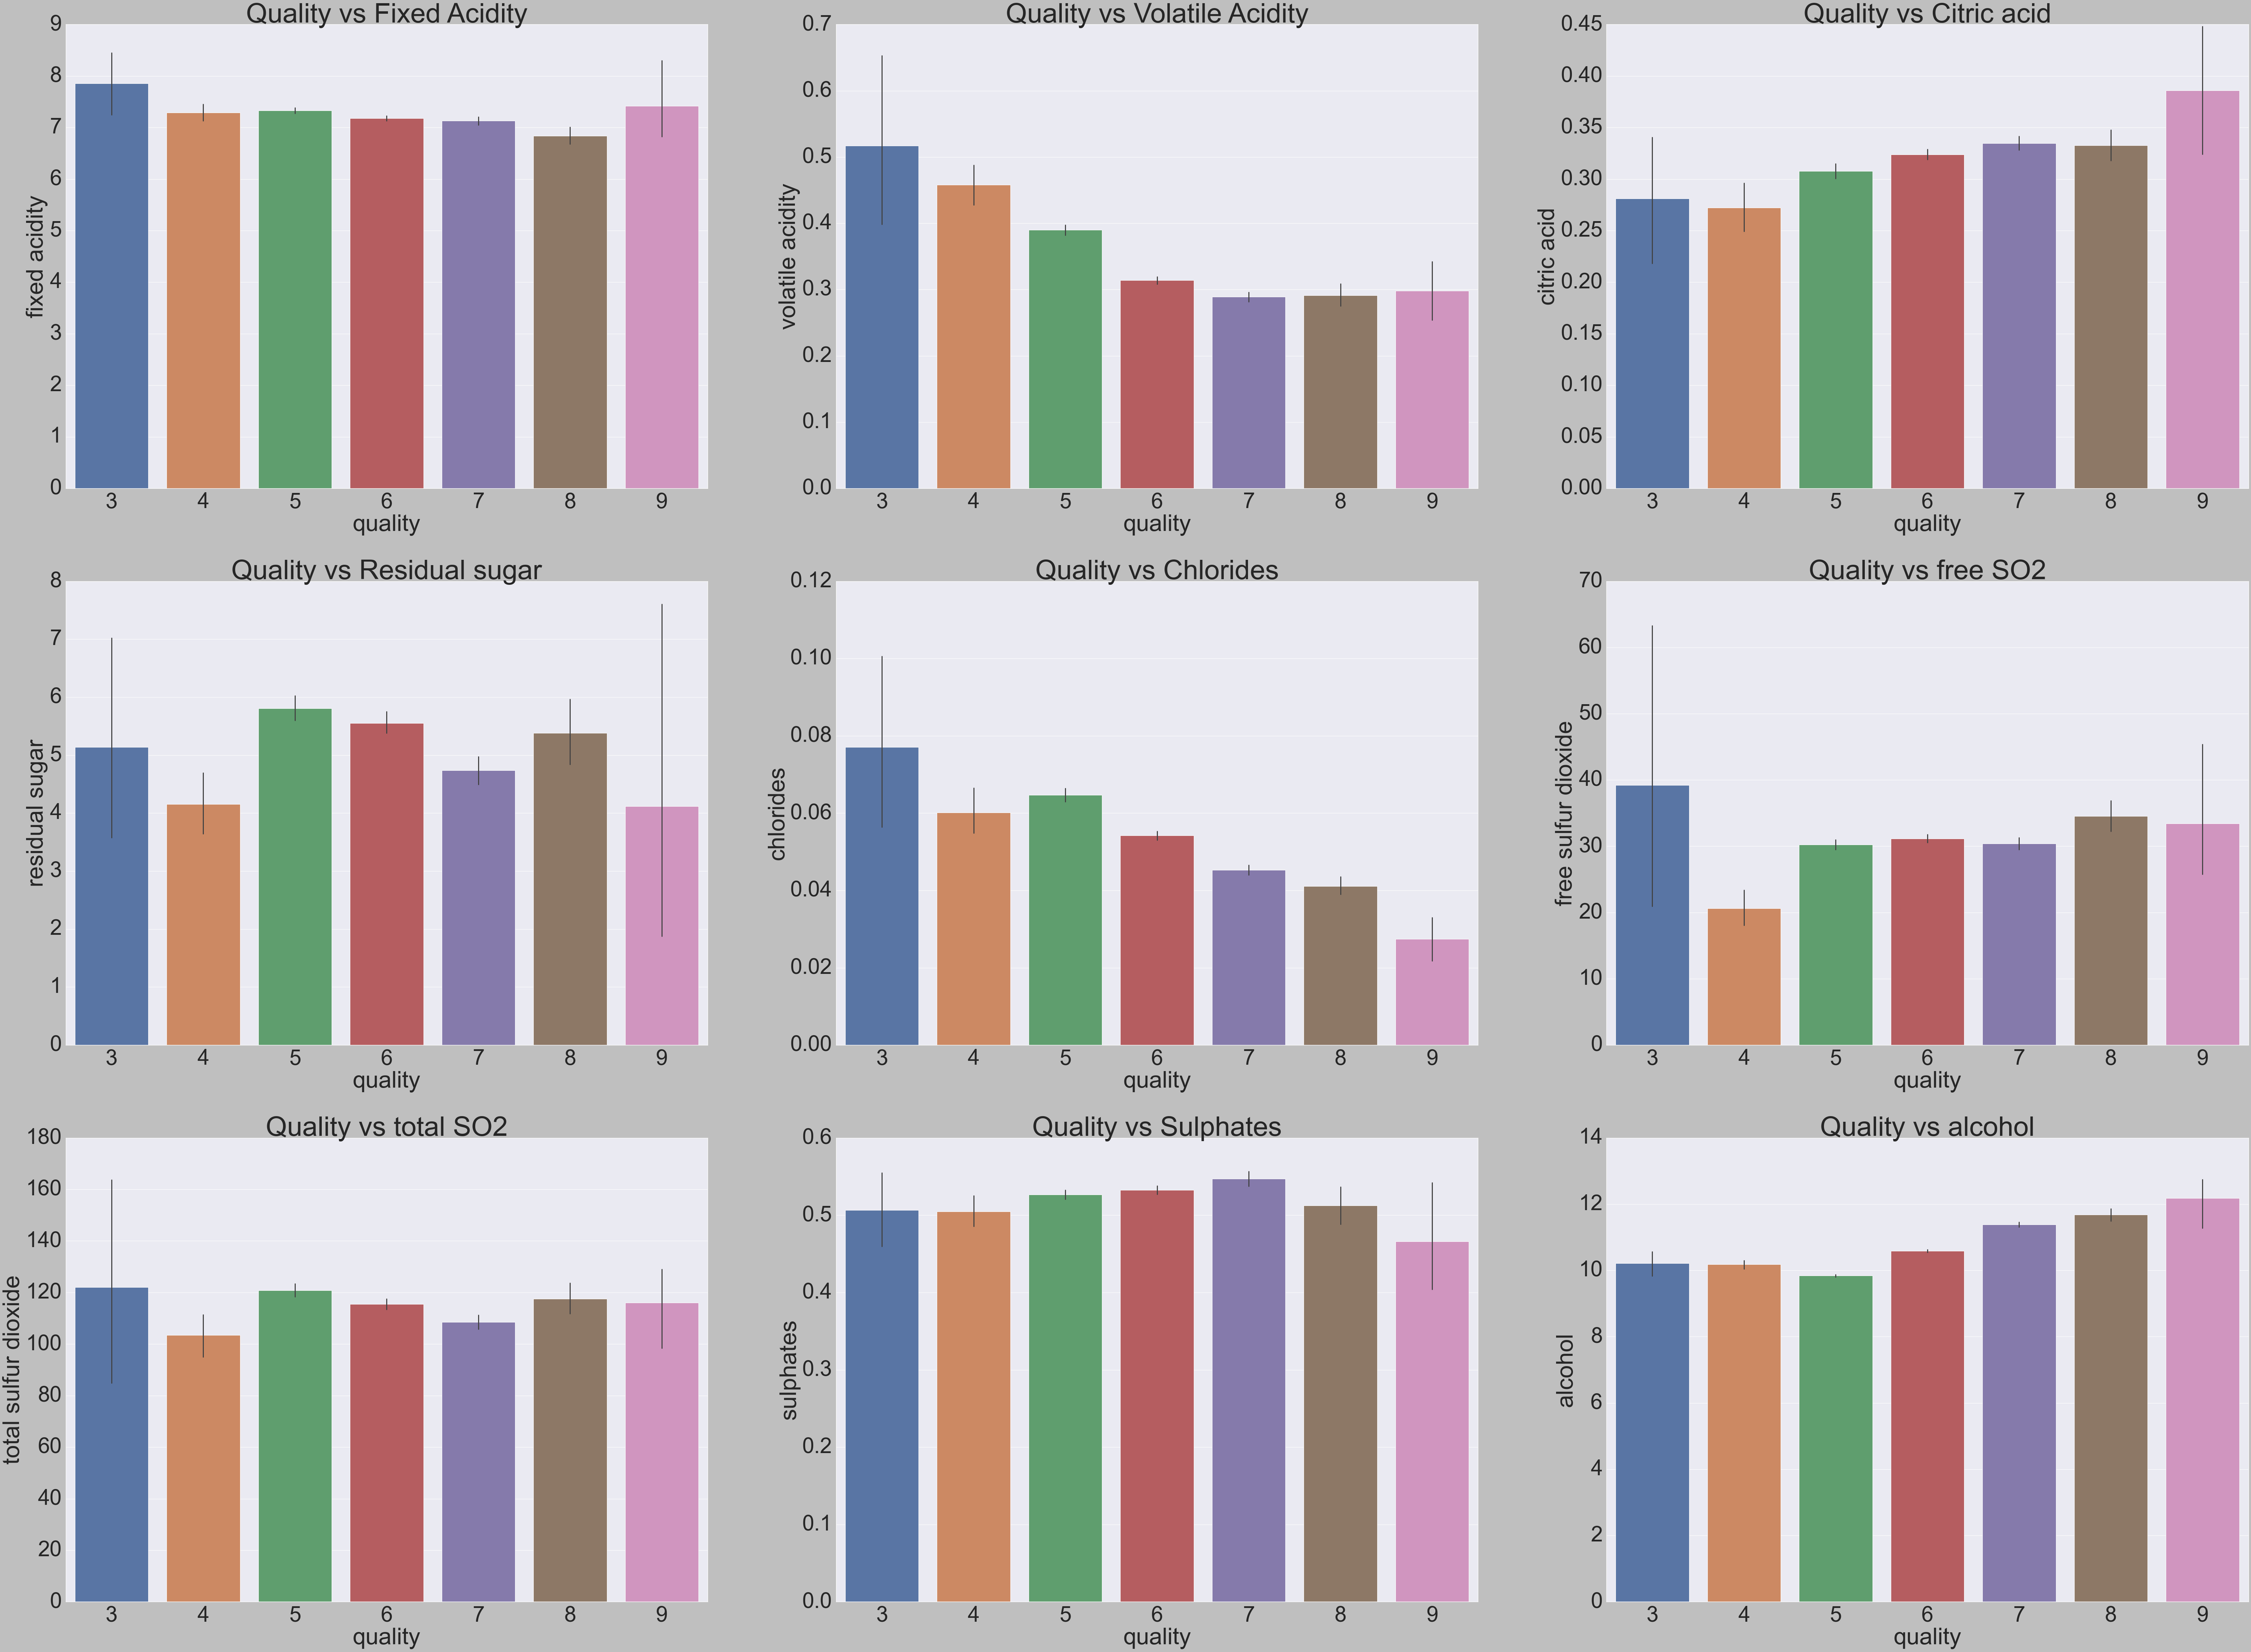

In [13]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [14]:
bins = (2, 6.5, 8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [15]:
label_quality = LabelEncoder()

In [16]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [17]:
df['quality'].value_counts()

0    5220
1    1272
2       5
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Quality vs Count'}, xlabel='quality', ylabel='count'>

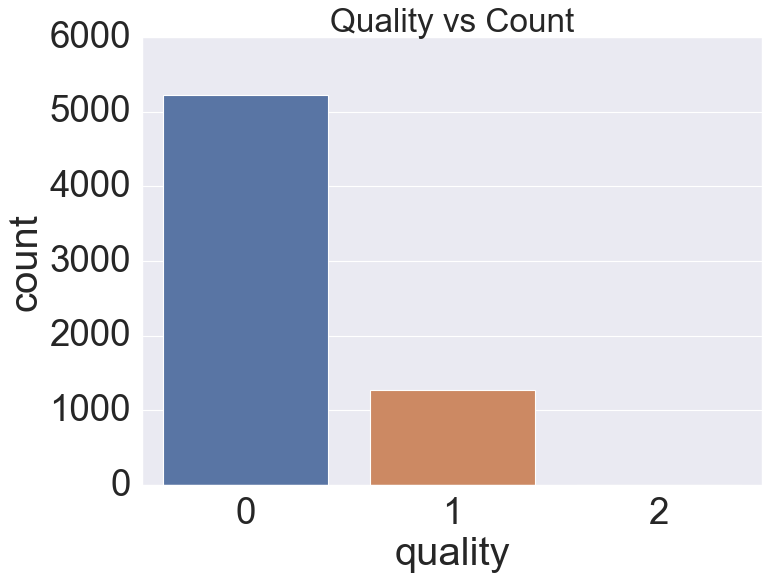

In [18]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])

In [19]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [21]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

In [23]:
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ValueError: could not convert string to float: 'white'